<a href="https://colab.research.google.com/github/tl614-rutgers/gisTest/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our code :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

### geopandas
https://geopandas.org/

a sister of pandas; does the job; tho not as fancy-interactive as folium or leafmap

just quick focus here on thematic/choloropleth maps: coloring polygons (states, counties, etc) with values of a var, say crime: green=low, red=hi

REFS (also good for self study):

https://geopandas.org/en/stable/gallery/choropleths.html

https://geopandas.org/en/stable/gallery/choro_legends.html

https://geopandas.org/en/stable/gallery/geopandas_rasterio_sample.html

In [ ]:
#! pip install geopandas
#!pip install mapclassify
import geopandas as gpd
#import mapclassify

## mapping your area of interest

say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

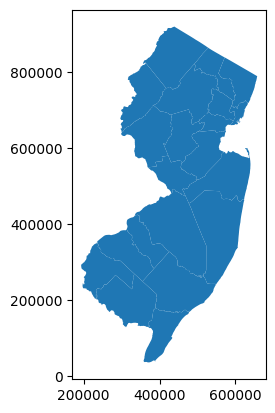

In [ ]:
#make the map
njC.plot()

## mapping var from data file

In [ ]:
# say want to map housing values across nj counties; first need to get the map with counties
# (then we will get regular data with housing values and merge with counties data and color code the polygons)
# maps have their own files, a popular one is 'shapefile', so if you want to map nj counties
# first step is to get the geo data so google 'geography you're looking for + 'shapefile'', eg 'nj counties shapefile'
# i found one and put on my website
# have it zipped--one shapefile consists of several files--keep them in one zipped folder and dont change their names
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [ ]:
njC.dtypes #with geopandas can do stuff like with pandas :)

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [ ]:
njC.head(2)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."


<Axes: >

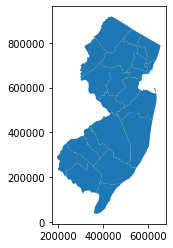

In [ ]:
njC.plot() #yay love the shape

<Axes: >

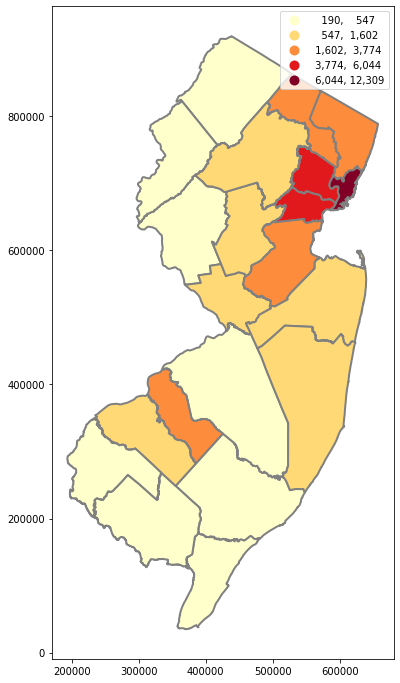

In [ ]:
#sometimes lucky and have the variable we want to map in the shapefile
njC.plot(figsize=(10,12),column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"}) #,ax=ax

<Axes: >

<Axes: >

[]

[]

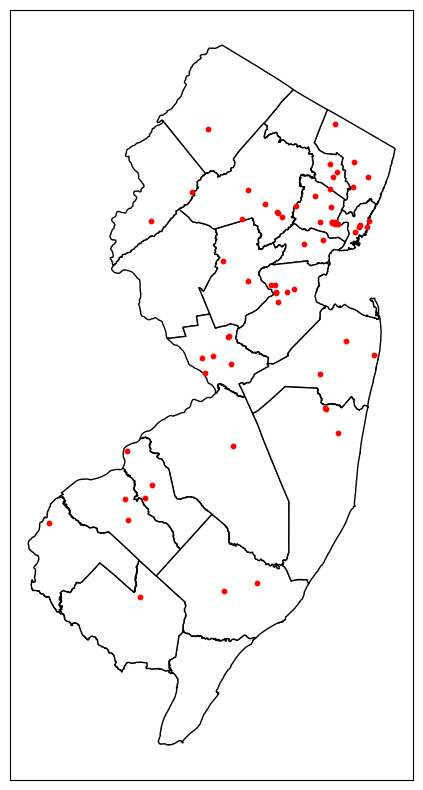

In [ ]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O col.zip  https://docs.google.com/uc?id=1bb9KES6QDE7cleE4L38yQ7939LlXUHB5&export=download
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

col = gpd.read_file('2007_11_30_NJ_COLL_UNIV_njsp.shp')
#col.dtypes

fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
col.plot(ax=ax, marker='o', color='red', markersize=10)
#col.plot(column='ENROLL',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_title('Watersheds by area ($mi^2$)')

In [ ]:
#ok that was fun but remember we want to map housing prices
#but we dont have that info in counies shapefile :(
#so we need to find it elsewhere...and...merge!
#2nd dataset:  housing prices
!wget -q -O zillow.csv  https://docs.google.com/uc?id=1Q4tCZT0EfaJP_WGwKcxuPaQ_dDFonW4E&export=download
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset

,UPPER,Data Type,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012
0,NEW JERSEY,All Homes,256100,"$256,900","$258,300","$259,100",259700.0
1,ATLANTIC,All Homes,179900,"$179,700","$181,200","$183,100",185800.0
2,BERGEN,All Homes,375200,"$376,600","$377,000","$377,600",380000.0


<ipython-input-6-50a8c1cb7527>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


In [ ]:
#merge
njC1 = pd.merge(njC, zil1, on='COUNTY',how='outer',indicator=True)
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge
njC2 = pd.merge(njC, zil1, on='COUNTY',how='inner',indicator=False)

,COUNTY,Dec 2012,POPDEN2010,_merge
0,ATLANTIC,185800.0,450.0,both
1,BERGEN,380000.0,3774.0,both
2,BURLINGTON,197800.0,547.0,both
3,CAMDEN,149400.0,2257.0,both
4,CAPE MAY,313600.0,340.0,both
5,CUMBERLAND,120100.0,313.0,both
6,ESSEX,282800.0,6044.0,both
7,GLOUCESTER,175900.0,857.0,both
8,HUDSON,293100.0,12309.0,both
9,HUNTERDON,327000.0,293.0,both


<Axes: >

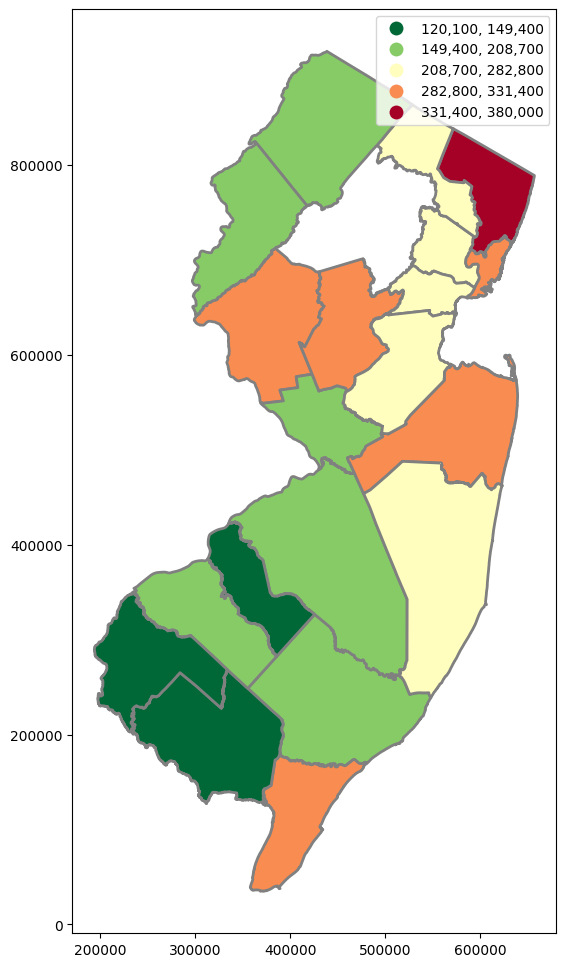

In [ ]:
njC2.plot(figsize=(10,12),column='Dec 2012',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})

#### abortions example
(make sure to have njC shapefile from previous sec)

In [ ]:
# get data: https://data.guttmacher.org/ has a nice API
# can click thru to get the table we want, which results in url (can open in webbrowser):
# https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ
# and then can right click on 'download xls' (csv is messy in this case) button under the table and 'copy link address' and paste into wget (need quotes!):
!wget -q -O njAb.xls  "https://data.guttmacher.org/download?locationType=county&visualization=datatable&topic=244+247&locations=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&measures=424+425+426+427+428+429+436+437+438+439+440+441+442&totalKey=NJ"

In [ ]:
# alternatively can scrap the table
#import requests
#url = 'https://data.guttmacher.org/counties/table?county=34001+34003+34005+34007+34009+34011+34013+34015+34017+34019+34021+34023+34025+34027+34029+34031+34033+34035+34037+34039+34041&topics=244+247&dataset=data&state=NJ'
#header = {
#  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
#  "X-Requested-With": "XMLHttpRequest"
#}
#r = requests.get(url, headers=header)
#pd.read_html(r.text,match='U.S. County',flavor=None)[0].head(3) #for match just putting name of first col

In [ ]:
njAb=pd.read_excel('njAb.xls')
njAb.head(3)

,U.S. County,"Total no. of female contraceptive clients served at publicly funded clinics, 2015 [1]","Total publicly funded clinics, 2015 [1]","No. of federally qualified health centers, 2015 [1]","Total no. of female contraceptive clients served at publicly funded clinics, younger than 20, 2015 [1]","No. of female contraceptive clients served at federally qualified health centers, 2015 [1]","No. of health department clinics, 2015 [1]","No. of female contraceptive clients served at health department clinics, 2015 [1]","No. of hospital-based clinics, 2015 [1]","No. of Planned Parenthood clinics, 2015 [1]","No. of female contraceptive clients served at hospital-based clinics, 2015 [1]","No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]","No. of other clinics, 2015 [1]","No. of female contraceptive clients served at other clinics, 2015 [1]"
0,NJ Total,"109,940",121,75,"16,880","35,510",2,880,8,26,"5,840","59,530",10,"8,190"
1,Atlantic,"3,300",6,4,670 [2],"2,000",0,0,0,2,0,"1,300",0,0
2,Bergen,"10,380",6,3,"1,000","2,790",0,0,1,2,780,"6,810",0,0


In [ ]:
#look at shapefile col names
njC

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,U.S. County
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31...",Atlantic
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",Bergen
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.690 491361.780, 436701.190 49...",Burlington
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.990 423475.830, 342804.100 42...",Camden
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17...",Cape May
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,132866,313,292,275,265,SOUTHERN,704221.618565,1.398925e+10,"POLYGON ((333743.882 268331.623, 341456.371 26...",Cumberland
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,850451,6044,6118,5768,6556,NORTHEASTERN,344556.557700,3.616984e+09,"POLYGON ((541167.940 755990.810, 541175.500 75...",Essex
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,199917,857,758,684,595,SOUTHERN,560703.567470,9.372632e+09,"POLYGON ((315566.250 382993.340, 315650.440 38...",Gloucester
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,556972,12309,11817,10733,10808,NORTHEASTERN,381357.990132,1.436708e+09,"MULTIPOLYGON (((586210.281 660143.720, 586222....",Hudson
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,87361,293,279,246,200,CENTRAL,561760.929390,1.219175e+10,"POLYGON ((391770.815 705704.676, 392388.938 70...",Hunterdon


In [ ]:
njC['U.S. County']=njC['COUNTY_LAB'].str.replace(' County','') #get rid of ' County' [note space in front of county]
njC.head(5)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry,U.S. County
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31...",Atlantic
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78...",Bergen
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.690 491361.780, 436701.190 49...",Burlington
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.990 423475.830, 342804.100 42...",Camden
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17...",Cape May


In [ ]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='outer',indicator=True)
njCAb.head(50) # ok fine just junk from the bottom like sources etc and NJ as state didnt merge, so can do clean inner merge

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,"No. of female contraceptive clients served at federally qualified health centers, 2015 [1]","No. of health department clinics, 2015 [1]","No. of female contraceptive clients served at health department clinics, 2015 [1]","No. of hospital-based clinics, 2015 [1]","No. of Planned Parenthood clinics, 2015 [1]","No. of female contraceptive clients served at hospital-based clinics, 2015 [1]","No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]","No. of other clinics, 2015 [1]","No. of female contraceptive clients served at other clinics, 2015 [1]",_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549.0,...,"2,000",0,0,0,2,0,"1,300",0,0,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116.0,...,"2,790",0,0,1,2,780,"6,810",0,0,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734.0,...,480,0,0,1,1,580,"1,140",0,0,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657.0,...,"1,490",0,0,2,2,"1,550","4,210",0,0,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265.0,...,660,2,880,0,0,0,0,0,0,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898.0,...,"1,320",0,0,0,0,0,0,2,"1,230",both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969.0,...,"4,300",0,0,0,4,0,"11,520",0,0,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288.0,...,250,0,0,0,0,0,0,2,"1,230",both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266.0,...,"8,600",0,0,0,0,0,0,3,"2,720",both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349.0,...,0,0,0,0,1,0,690,0,0,both


In [ ]:
njCAb = pd.merge(njC, njAb, on='U.S. County',how='inner',indicator=True) #inner merge
njCAb

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,"No. of female contraceptive clients served at federally qualified health centers, 2015 [1]","No. of health department clinics, 2015 [1]","No. of female contraceptive clients served at health department clinics, 2015 [1]","No. of hospital-based clinics, 2015 [1]","No. of Planned Parenthood clinics, 2015 [1]","No. of female contraceptive clients served at hospital-based clinics, 2015 [1]","No. of female contraceptive clients served at Planned Parenthood clinics, 2015 [1]","No. of other clinics, 2015 [1]","No. of female contraceptive clients served at other clinics, 2015 [1]",_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,"2,000",0,0,0,2,0,"1,300",0,0,both
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,"2,790",0,0,1,2,780,"6,810",0,0,both
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,480,0,0,1,1,580,"1,140",0,0,both
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,"1,490",0,0,2,2,"1,550","4,210",0,0,both
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,660,2,880,0,0,0,0,0,0,both
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,"1,320",0,0,0,0,0,0,2,"1,230",both
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,"4,300",0,0,0,4,0,"11,520",0,0,both
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,250,0,0,0,0,0,0,2,"1,230",both
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,"8,600",0,0,0,0,0,0,3,"2,720",both
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,0,0,0,0,1,0,690,0,0,both


In [ ]:
njCAb.dtypes

COUNTY                                                                                                      object
COUNTY_LAB                                                                                                  object
CO                                                                                                          object
GNIS_NAME                                                                                                   object
GNIS                                                                                                        object
FIPSSTCO                                                                                                    object
FIPSCO                                                                                                      object
ACRES                                                                                                      float64
SQ_MILES                                                                        

In [ ]:
#need to convert string (object) to numeric (float or int; float is safer can have decimals if needed)
njCAb['publicly funded clinics, 2015'] = njCAb['Total publicly funded clinics, 2015 [1]'].astype(float)

In [ ]:
njCAb[['U.S. County','Total publicly funded clinics, 2015 [1]','publicly funded clinics, 2015']]

,U.S. County,"Total publicly funded clinics, 2015 [1]","publicly funded clinics, 2015"
0,Atlantic,6,6.0
1,Bergen,6,6.0
2,Burlington,4,4.0
3,Camden,10,10.0
4,Cape May,4,4.0
5,Cumberland,6,6.0
6,Essex,15,15.0
7,Gloucester,3,3.0
8,Hudson,14,14.0
9,Hunterdon,1,1.0


<Axes: >

[]

[]

Text(0.5, 1.0, 'count of publicly funded abortion clinics, 2015')

Text(0.5, 0.1, 'data from guttmacher.org \n            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017')

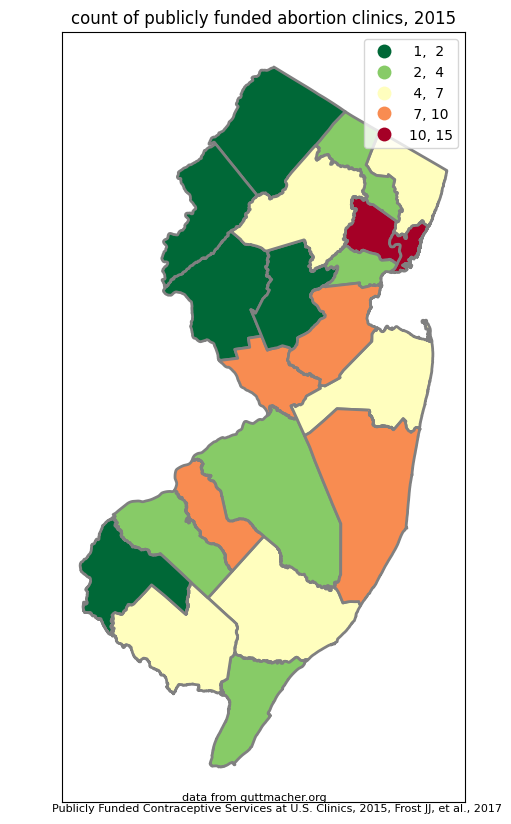

In [ ]:
fig, ax = plt.subplots(figsize=(6,10))

njCAb.plot(ax=ax,figsize=(10,12),column='publicly funded clinics, 2015',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('count of publicly funded abortion clinics, 2015')
#ax.annotate('Note added to chart with minimum parameters', xy = (200000, 1000))
plt.figtext(0.5, 0.1,
            '''data from guttmacher.org
            Publicly Funded Contraceptive Services at U.S. Clinics, 2015, Frost JJ, et al., 2017''',
            ha="center", fontsize=8, #bbox={"facecolor":"white", "alpha":0.5, "pad":5}
            )

# TODO expand massively on geopandas all bells and whistles
TODO do a bit of pandas for dat man like reading in data and looking at it!!


## notes to myself

the whole course, geo dat sci:
https://darribas.org/gds_course/content/home.html

LATER:
 basemap! guess the first one! used to use it, but dead, depreciated in favor of cartopy
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html